In [25]:
import numpy as np
import scipy as sp
from scipy import stats
import matplotlib.pyplot as plt

Problem 1
=============

In [134]:
#Part A 

#data = np.genfromtxt('/Users/bryanchia/Desktop/BootCamp2017/ProbSets/Econ/Wk4_StrEst/data/clms.txt', delimiter = ',')

pts = np.loadtxt('data/clms.txt')

sum_stats = stats.describe(data)

print(' Mean = ', sum_stats[2],"\n Median = ",np.median(data), "\n Variance = ", sum_stats[3], "\n Minimum = ", np.amin(data), "\n Maximum = ", np.amax(data))

 Mean =  720.277975327 
 Median =  172.21 
 Variance =  15783543.6707 
 Minimum =  0.01 
 Maximum =  227967.25


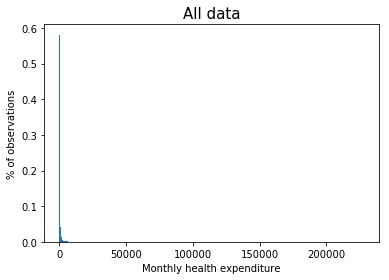

In [135]:
weights = (1 / pts.shape[0]) * np.ones_like(pts)

plt.clf()
plt.hist(data, 1000, weights = weights)
plt.title('All data', fontsize=15)
plt.xlabel(r'Monthly health expenditure')
plt.ylabel(r'% of observations')
plt.set_xlim = ([0,800])
plt.show()

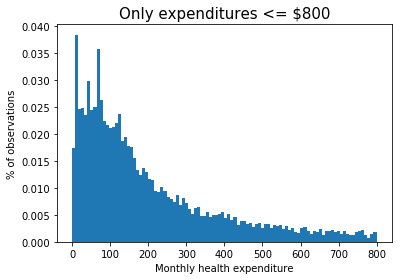

0.849420849421
0.8494208494208494


In [164]:
data2 = pts[pts < 800]

weights1 = 1 / (data.shape[0]) * np.ones_like(data2)

n, bin_cuts, patches = plt.hist(data2, 100, weights = weights1)
plt.title('Only expenditures <= $800', fontsize=15)
plt.xlabel(r'Monthly health expenditure')
plt.ylabel(r'% of observations')
plt.set_xlim = ([0,800])
plt.show()

#Check that the percentages match up 
print(n.sum())
print(data2.shape[0] / data.shape[0])

In [226]:
#Part B

def gamma_pdf(xvals, alpha, beta):

    pdf_vals = (1 / ((beta ** alpha) * sp.special.gamma(alpha))) * xvals ** (alpha - 1) * np.exp (-xvals / beta)
    pdf_vals[np.isclose(pdf_vals, np.zeros_like(pdf_vals), atol = 1e-25)] = 1e-24
    return pdf_vals

# Define log likelihood function for the normal distribution
def log_lik_gammanorm(xvals, alpha, beta):

    pdf_vals = gamma_pdf(xvals, alpha, beta)
    ln_pdf_vals = np.log(pdf_vals)
    log_lik_val = ln_pdf_vals.sum()
    
    return log_lik_val

def crit(params, args):

    alpha, beta = params
    xvals = args
    log_lik_val = log_lik_gammanorm(xvals, alpha, beta)
    neg_log_lik_val = -log_lik_val
    
    return neg_log_lik_val

beta_init = pts.var() / pts.mean()
alpha_init = pts.mean() / beta_init
params_init = np.array([alpha_init, beta_init])
mle_args = pts
bnds = ((1e-5, None),(1e-5, None))
results = opt.minimize(crit, params_init, args= mle_args, method = 'L-BFGS-B', bounds = bnds)
galpha_MLE, gbeta_MLE = results.x
print('alpha_MLE=', galpha_MLE, ' beta_MLE=', gbeta_MLE)
print('function value =', results.fun)

alpha_MLE= 0.221755322727  beta_MLE= 21911.0646992
function value = 82076.4516057


/Users/bryanchia/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in power
  """


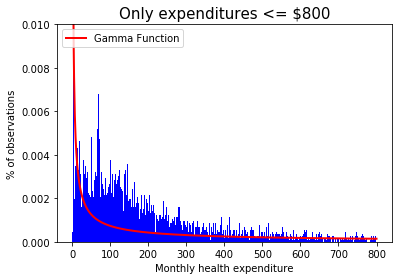

In [227]:
dist_pts = np.linspace(0, 800, 800)
n, bin_cuts, patches = plt.hist(data2, 800, weights = weights1, color = 'b')
plt.title('Only expenditures <= $800', fontsize=15)
plt.xlabel(r'Monthly health expenditure')
plt.ylabel(r'% of observations')
plt.plot(dist_pts, gamma_pdf(dist_pts, galpha_MLE, gbeta_MLE),
         linewidth=2, color='r', label='Gamma Function')
plt.legend(loc='upper left')
plt.ylim([0,0.010])

plt.show()

In [228]:
#Part C

def ggamma_pdf(xvals, alpha, beta, m):

    pdf_vals = m/((beta**alpha)*sp.special.gamma(alpha/m))*(xvals**(alpha - 1))*np.exp(-(xvals/beta)**m)
    pdf_vals[np.isclose(pdf_vals, np.zeros_like(pdf_vals), atol = 1e-25)] = 1e-24
    return pdf_vals

# Define log likelihood function for the normal distribution
def log_lik_ggammanorm(xvals, alpha, beta, m):

    pdf_vals = ggamma_pdf(xvals, alpha, beta, m)
    ln_pdf_vals = np.log(pdf_vals)
    log_lik_val = ln_pdf_vals.sum()
    
    return log_lik_val

def crit(params, args):

    alpha, beta, m = params
    xvals = args
    log_lik_val = log_lik_ggammanorm(xvals, alpha, beta, m)
    neg_log_lik_val = -log_lik_val
    
    return neg_log_lik_val

beta_init = gbeta_MLE
alpha_init = galpha_MLE 
m_init = 1
params_init = np.array([alpha_init, beta_init, m_init])
mle_args = pts
bnds = ((1e-5, None),(1e-5, None),(1e-5, None) )
results = opt.minimize(crit, params_init, args= mle_args, method = 'L-BFGS-B', bounds = bnds)
ggalpha_MLE, ggbeta_MLE, ggm_MLE = results.x
print('alpha_MLE=', ggalpha_MLE, ' beta_MLE=', ggbeta_MLE, ' m_MLE=', ggm_MLE)
print('function value =', results.fun)

alpha_MLE= 0.221753542328  beta_MLE= 21911.0644933  m_MLE= 0.997722630154
function value = 82076.4464785


/Users/bryanchia/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in power
  """


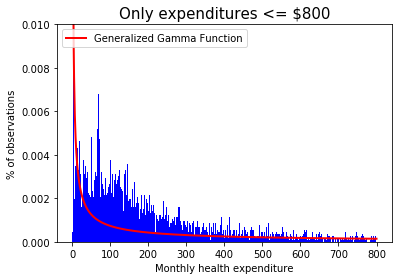

In [229]:
dist_pts = np.linspace(0, 800, 800)
n, bin_cuts, patches = plt.hist(data2, 800, weights = weights1, color = 'b')
plt.title('Only expenditures <= $800', fontsize=15)
plt.xlabel(r'Monthly health expenditure')
plt.ylabel(r'% of observations')
plt.plot(dist_pts, ggamma_pdf(dist_pts, ggalpha_MLE, ggbeta_MLE, ggm_MLE),
         linewidth=2, color='r', label='Generalized Gamma Function')
plt.legend(loc='upper left')
plt.ylim([0,0.010])

plt.show()

In [258]:
#Part C

def gb2_pdf(xvals, alpha, beta, p, q): 

    power1 = (alpha*p)
    if np.isclose(power1, 0, atol = 1e-30):
        power1 = 1e-29
    
    power2 = alpha
    if np.isclose(power2, 0, atol = 1e-30):
        power2 = 1e-29
    
    power3 = (p + q)
    if np.isclose(power3, 0, atol = 1e-30):
        power3 = 1e-29
    
    power4 = (alpha*p - 1)
    if np.isclose(power4, 0, atol = 1e-30):
        power4 = 1e-29
    
    denom = (beta**power1*sp.special.beta(p, q)*(1 + (xvals/beta)**power2)**power3)
    denom[np.isclose(denom, np.zeros_like(denom), atol = 1e-30)] = 1e-29
    
    pdf_vals = (alpha*xvals**power4)/denom
    pdf_vals[np.isclose(pdf_vals, np.zeros_like(pdf_vals), atol = 1e-30)] = 1e-29
    return pdf_vals

# Define log likelihood function for the normal distribution
def log_lik_gb2norm(xvals, alpha, beta, p, q):

    pdf_vals = gb2_pdf(xvals, alpha, beta, p, q)
    ln_pdf_vals = np.log(pdf_vals)
    log_lik_val = ln_pdf_vals.sum()
    
    return log_lik_val

def crit(params, args):

    alpha, beta, p, q = params
    xvals = args
    log_lik_val = log_lik_gb2norm(xvals, alpha, beta, p, q)
    neg_log_lik_val = -log_lik_val
    
    return neg_log_lik_val

q_init = 10000
alpha_init = ggm_MLE
beta_init = q_init**(1/a_init)*ggbeta_MLE
p_init = ggalpha_MLE/ggm_MLE
params_init = np.array([alpha_init, beta_init, m_init, q_init])
mle_args = pts
bnds = ((1e-5, None),(1e-5, None),(1e-5, None),(1e-5, None) )
results = opt.minimize(crit, params_init, args= mle_args, method = 'L-BFGS-B', bounds = bnds)
gb2alpha_MLE, gb2beta_MLE, gb2p_MLE, gb2q_MLE = results.x
print('alpha_MLE=', gb2alpha_MLE, ' beta_MLE=', gb2beta_MLE, ' p_MLE=', gb2p_MLE, ' q_MLE=', gb2p_MLE)
print('function value =', results.fun)

alpha_MLE= 0.69682921099  beta_MLE= 223767549.919  p_MLE= 1.01877747999  q_MLE= 1.01877747999
function value = 76417.2184782


/Users/bryanchia/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in power


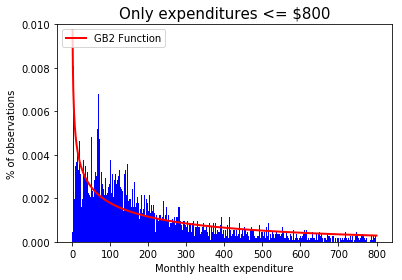

In [259]:
dist_pts = np.linspace(0, 800, 800)
n, bin_cuts, patches = plt.hist(data2, 800, weights = weights1, color = 'b')
plt.title('Only expenditures <= $800', fontsize=15)
plt.xlabel(r'Monthly health expenditure')
plt.ylabel(r'% of observations')
plt.plot(dist_pts, gb2_pdf(dist_pts, gb2alpha_MLE, gb2beta_MLE, gb2p_MLE, gb2q_MLE),
         linewidth=2, color='r', label='GB2 Function')
plt.legend(loc='upper left')
plt.ylim([0,0.010])

plt.show()

In [237]:
#Part D

#Between Gamma and GB2
glog_lik_mle = log_lik_gammanorm(pts, galpha_MLE, gbeta_MLE)
gb2log_lik_mle = log_lik_gb2norm(pts, gb2alpha_MLE, gb2beta_MLE, gb2p_MLE, gb2q_MLE)
LR_val = 2 * (gb2log_lik_mle - glog_lik_mle )
pval_h0 = 1.0 - stats.chi2.cdf(LR_val, 2)
print('Gamma & GB2 chi squared of H0 with 2 degrees of freedom p-value = ', pval_h0)

#Between GG and GB2
gglog_lik_mle = log_lik_ggammanorm(pts, ggalpha_MLE, ggbeta_MLE, ggm_MLE)
gb2log_lik_mle = log_lik_gb2norm(pts, gb2alpha_MLE, gb2beta_MLE, gb2p_MLE, gb2q_MLE)
LR_val = 2 * (gb2log_lik_mle - gglog_lik_mle)
pval_h0 = 1.0 - stats.chi2.cdf(LR_val, 1)
print('GG and GB2 chi squared of H0 with 1 degrees of freedom p-value = ', pval_h0)

Gamma & GB2 chi squared of H0 with 2 degrees of freedom p-value =  0.0
GG and GB2 chi squared of H0 with 1 degrees of freedom p-value =  0.0


In [249]:
def gamma_pdf_i(xvals, alpha, beta):

    pdf_vals = (1 / ((beta ** alpha) * sp.special.gamma(alpha))) * xvals ** (alpha - 1) * np.exp (-xvals / beta)
    #pdf_vals[np.isclose(pdf_vals, np.zeros_like(pdf_vals), atol = 1e-25)] = 1e-24
    return pdf_vals

def gb2_pdf_i(xvals, alpha, beta, p, q): 

    power1 = (alpha*p)
    if np.isclose(power1, 0, atol = 1e-30):
        power1 = 1e-29
    
    power2 = alpha
    if np.isclose(power2, 0, atol = 1e-30):
        power2 = 1e-29
    
    power3 = (p + q)
    if np.isclose(power3, 0, atol = 1e-30):
        power3 = 1e-29
    
    power4 = (alpha*p - 1)
    if np.isclose(power4, 0, atol = 1e-30):
        power4 = 1e-29
    
    denom = (beta**power1*sp.special.beta(p, q)*(1 + (xvals/beta)**power2)**power3)
    #denom[np.isclose(denom, np.zeros_like(denom), atol = 1e-30)] = 1e-29
    
    pdf_vals = (alpha*xvals**power4)/denom
    #pdf_vals[np.isclose(pdf_vals, np.zeros_like(pdf_vals), atol = 1e-30)] = 1e-29
    return pdf_vals

In [255]:
gamma = lambda x: gamma_pdf_i(x, galpha_MLE, gbeta_MLE)

(vals, err) = sp.integrate.quad(gamma, 1000, np.inf)

print("Gamma Function Percentage of people with expenditure above 1000: ",vals)

gb2= lambda x: gb2_pdf_i(x, gb2alpha_MLE, gb2beta_MLE, gb2p_MLE, gb2q_MLE)

(vals1, err1) = sp.integrate.quad(gb2, 1000, np.inf)

print("GB2 Function Percentage of people with expenditure above 1000: ",vals1)


Gamma Function Percentage of people with expenditure above 1000:  0.45195974447843174
GB2 Function Percentage of people with expenditure above 1000:  0.15591617356707965
